<a href="https://colab.research.google.com/github/Thasneem-vazim/Depression-detection-with-15-features-with-and-without-using-DR-techniques/blob/main/Experiments_with_tsne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import plotly.express as px
np.random.seed(13)
file=pd.read_csv("/content/Copy of Survey (Responses) - Form Responses 1 (2).csv")
x=file[["1) Sadness","2) Discouragement","3) Low self-esteem","4) Inferiority","5) Guilt","6) Indecisiveness","7) Irritability","8) Loss of interest in life","9) Loss of motivation","10) Poor self-image","11) Appetite changes","12) Sleep changes","13) Loss of positivity","14) Hypochondriasis","15) Suicidal impulses"]]

y=file["Class"]

In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
x = tsne.fit_transform(x) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 206 samples in 0.001s...
[t-SNE] Computed neighbors for 206 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 206 / 206
[t-SNE] Mean sigma: 1.482303
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.215485
[t-SNE] KL divergence after 1000 iterations: 0.783151


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)

In [12]:
from sklearn.svm import SVC
SVM=SVC()
SVM.fit(x_train,y_train)

SVC()

In [13]:
prediction=SVM.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  79.6116504854369


                       precision    recall  f1-score   support

Borderline depression       0.65      1.00      0.79        22
      Mild depression       0.93      0.73      0.82        37
  Moderate depression       0.83      0.91      0.87        32
        No depression       0.00      0.00      0.00         7
    Severe depression       0.80      0.80      0.80         5

             accuracy                           0.80       103
            macro avg       0.64      0.69      0.65       103
         weighted avg       0.77      0.80      0.77       103



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


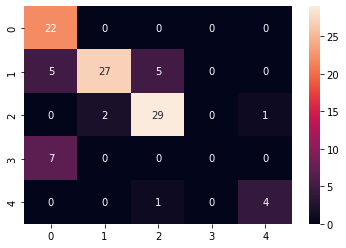

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
y1_predict_test=SVM.predict(x_test)
cm1=confusion_matrix(y_test,y1_predict_test)
import seaborn as sns
sns.heatmap(cm1,annot=True)
print(classification_report(y_test,y1_predict_test))

                       precision    recall  f1-score   support

Borderline depression       0.75      0.82      0.78        22
      Mild depression       0.67      0.65      0.66        37
  Moderate depression       0.68      0.59      0.63        32
        No depression       0.56      0.71      0.63         7
    Severe depression       0.83      1.00      0.91         5

             accuracy                           0.69       103
            macro avg       0.70      0.75      0.72       103
         weighted avg       0.69      0.69      0.69       103



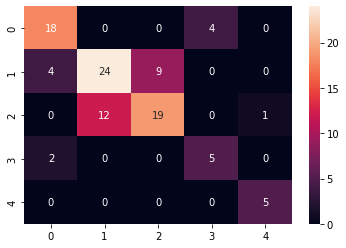

In [16]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT=DT.fit(x_train,y_train)
y4_predict_test=DT.predict(x_test)
cm4=confusion_matrix(y_test,y4_predict_test)
sns.heatmap(cm4,annot=True)
print(classification_report(y_test,y4_predict_test))

In [17]:
prediction=DT.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  68.93203883495146


                       precision    recall  f1-score   support

Borderline depression       0.82      0.82      0.82        22
      Mild depression       0.84      0.70      0.76        37
  Moderate depression       0.76      0.81      0.79        32
        No depression       0.60      0.86      0.71         7
    Severe depression       0.83      1.00      0.91         5

             accuracy                           0.79       103
            macro avg       0.77      0.84      0.80       103
         weighted avg       0.79      0.79      0.79       103



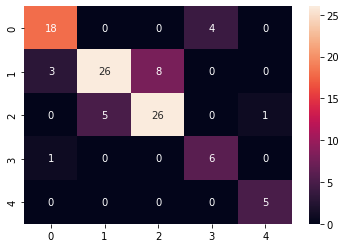

In [18]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100)
RF.fit(x_train, y_train)
y5_predict_test=RF.predict(x_test)
cm4=confusion_matrix(y_test,y5_predict_test)
sns.heatmap(cm4,annot=True)
print(classification_report(y_test,y5_predict_test))

In [19]:
prediction=RF.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  78.64077669902912


                       precision    recall  f1-score   support

Borderline depression       0.77      0.91      0.83        22
      Mild depression       0.77      0.65      0.71        37
  Moderate depression       0.76      0.78      0.77        32
        No depression       0.75      0.86      0.80         7
    Severe depression       1.00      1.00      1.00         5

             accuracy                           0.78       103
            macro avg       0.81      0.84      0.82       103
         weighted avg       0.78      0.78      0.77       103



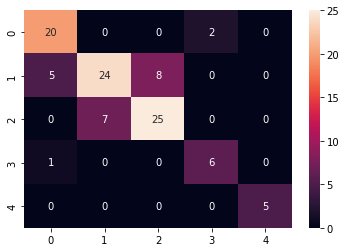

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)
y6_pred=knn.predict(x_test)
cm4=confusion_matrix(y_test,y6_pred)
sns.heatmap(cm4,annot=True)
print(classification_report(y_test,y6_pred))


In [21]:
prediction=knn.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  77.66990291262135


                       precision    recall  f1-score   support

Borderline depression       0.73      0.86      0.79        22
      Mild depression       0.72      0.76      0.74        37
  Moderate depression       0.82      0.72      0.77        32
        No depression       0.80      0.57      0.67         7
    Severe depression       1.00      1.00      1.00         5

             accuracy                           0.77       103
            macro avg       0.81      0.78      0.79       103
         weighted avg       0.77      0.77      0.77       103



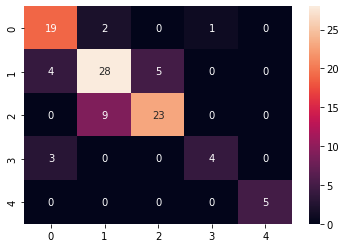

In [25]:
from xgboost import XGBClassifier
import xgboost as xgb
params = {
 'objective':'multi:softmax',
 'max_depth': 2, 'min_child_weight': 2, 'gamma': 0.3, 'subsample': 0.6,
 'colsample_bytree': 0.6, 'scale_pos_weight': 1,
 'alpha': 0.05,
 'learning_rate': 0.03,
 'n_estimators':1484,'seed': 27
 }
xgb_clf = XGBClassifier(**params)
xgb_clf.fit(x_train,y_train)

yxg_pred=xgb_clf.predict(x_test)
cm4=confusion_matrix(y_test,yxg_pred)
sns.heatmap(cm4,annot=True)
print(classification_report(y_test,yxg_pred))

In [26]:
prediction=xgb_clf.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  76.69902912621359


In [29]:
from sklearn.ensemble import GradientBoostingClassifier
GradeintBoostClassification = GradientBoostingClassifier(loss='deviance',max_features=1,random_state=0,max_leaf_nodes=None)
GradeintBoostClassification.fit(x_train,y_train)

GradientBoostingClassifier(max_features=1, random_state=0)

In [30]:
prediction=GradeintBoostClassification.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  76.69902912621359


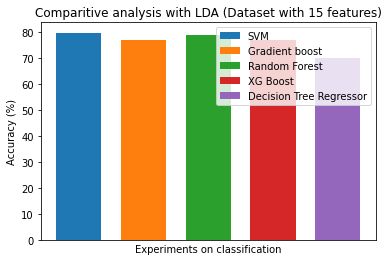

In [31]:
# Import Library
import numpy as np 
import matplotlib.pyplot as plt 

# Define Data
data3 = ['Using tsne']
xvals = [79.61]
yvals = [76.69]
zvals = [78.64]
avals = [76.69]
bvals = [69.93]

x_axis = np.arange(len(data3))

# Multi bar Chart
plt.bar(x_axis +0.1, xvals, width=0.07, label = 'SVM')
plt.bar(x_axis +0.1*2, yvals, width=0.07, label = 'Gradient boost')
plt.bar(x_axis +0.1*3, zvals, width=0.07, label = 'Random Forest')
plt.bar(x_axis +0.1*4, avals, width=0.07, label = 'XG Boost')
plt.bar(x_axis +0.1*5, bvals, width=0.07, label = 'Decision Tree Regressor')

# Xticks
plt.xticks(x_axis,data3)
plt.ylabel("Accuracy (%)")
plt.xlabel("Experiments on classification")
plt.title("Comparitive analysis with LDA (Dataset with 15 features)")
plt.legend()
plt.show()

In [28]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(x_train, y_train)
from sklearn.metrics import classification_report,confusion_matrix
y6_predict_test=regressor.predict(x_test)
cm1=confusion_matrix(y_test,y6_predict_test)
import seaborn as sns
sns.heatmap(cm1,annot=True)
print(classification_report(y_test,y6_predict_test))

ValueError: ignored